In [1]:
import numpy as np

In [2]:
import modin.pandas as pd

In [3]:
import pandas as old_pd

In [4]:
train_df = pd.read_csv('../data/raw/train.csv')

In [5]:
train_labels_df = pd.read_csv('../data/raw/train_labels.csv')

## Summary plots

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.


In [15]:
sns.set()

In [21]:
train_df = old_pd.DataFrame(train_df.values, columns=train_df.columns)

(pid=12763) 2019-11-06 17:43:42,158	WARNING worker.py:352 -- WARNING: Falling back to serializing objects of type <class 'datetime.date'> by using pickle. This may be inefficient.
(pid=12436) 2019-11-06 17:43:42,401	WARNING worker.py:352 -- WARNING: Falling back to serializing objects of type <class 'datetime.date'> by using pickle. This may be inefficient.
(pid=12706) 2019-11-06 17:43:42,359	WARNING worker.py:352 -- WARNING: Falling back to serializing objects of type <class 'datetime.date'> by using pickle. This may be inefficient.
(pid=12740) 2019-11-06 17:43:42,400	WARNING worker.py:352 -- WARNING: Falling back to serializing objects of type <class 'datetime.date'> by using pickle. This may be inefficient.
(pid=12869) 2019-11-06 17:43:42,401	WARNING worker.py:352 -- WARNING: Falling back to serializing objects of type <class 'datetime.date'> by using pickle. This may be inefficient.
(pid=12822) 2019-11-06 17:43:42,403	WARNING worker.py:352 -- WARNING: Falling back to serializing ob

In [17]:
accuracy_group_counts = train_labels_df.groupby('accuracy_group')['game_session'].count()

## Check observations over time

In [22]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

In [23]:
train_df['weekday_name'] = train_df['timestamp'].dt.weekday_name

In [24]:
train_df['date'] = train_df['timestamp'].dt.date

In [25]:
train_df['hour'] = train_df['timestamp'].dt.hour

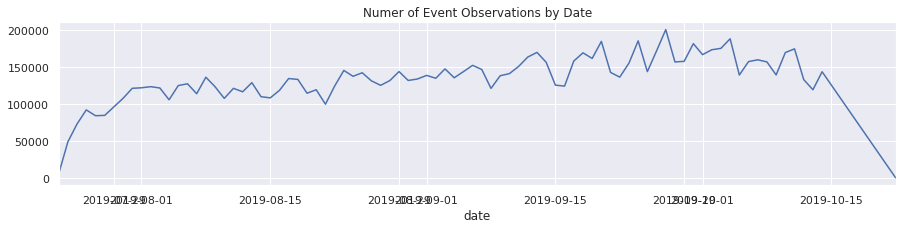

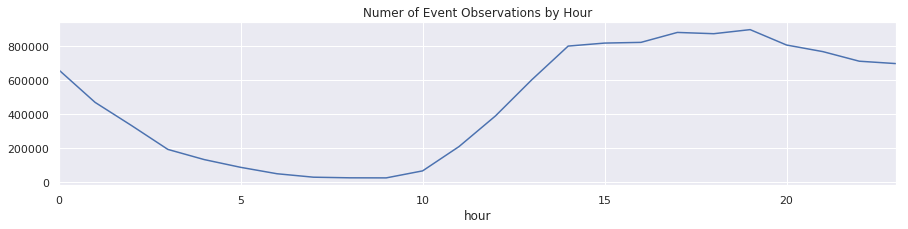

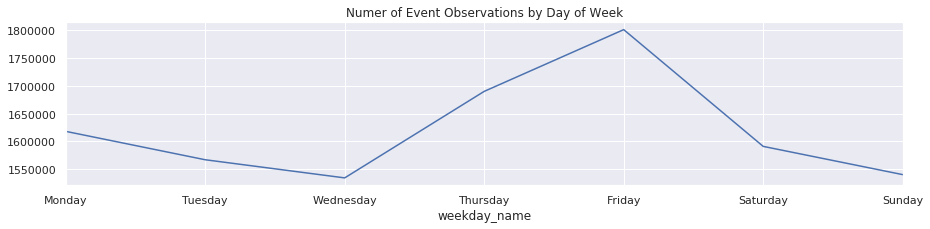

In [29]:
## Modified from https://www.kaggle.com/robikscube/2019-data-science-bowl-an-introduction
train_df.groupby('date')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Date')
plt.show()
train_df.groupby('hour')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Hour')
plt.show()
train_df.groupby('weekday_name')['event_id'] \
    .agg('count').T[['Monday','Tuesday','Wednesday',
                     'Thursday','Friday','Saturday',
                     'Sunday']].T.plot(figsize=(15, 3),
                                       title='Numer of Event Observations by Day of Week')
plt.show()

## Examine labels

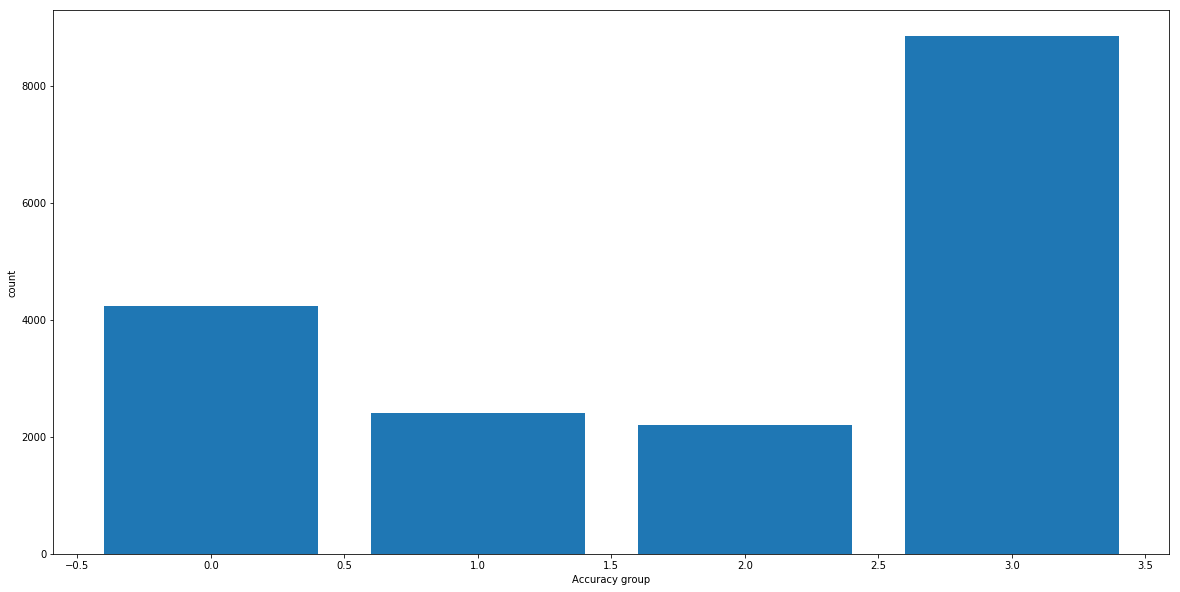

In [25]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(4), accuracy_group_counts)
plt.xlabel('Accuracy group')
plt.ylabel('count')
plt.show()

In [39]:
train_labels_pandas

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1,3
...,...,...,...,...,...,...,...
17685,c996482b11d149dd,ffc90c32,Bird Measurer (Assessment),1,0,1,3
17686,b05a02b52d5c1f4c,ffd2871d,Cauldron Filler (Assessment),1,0,1,3
17687,5448d652309a6324,ffeb0b1b,Cauldron Filler (Assessment),1,2,0.333333,1
17688,a6885ab824fbc32c,ffeb0b1b,Mushroom Sorter (Assessment),0,1,0,0
